# Challenge 1

## SciPy Tutorial
Pertinent information about [SciPy](https://docs.scipy.org/) and NumPy is available in the [SciPy Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html).
 * Read [Introduction](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)
 * Read [Basic functions](https://docs.scipy.org/doc/scipy/reference/tutorial/basic.html)
 * Read [Optimization](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
 
Consider the function defined below.
 * Plot the function using [matplotlib](https://matplotlib.org/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


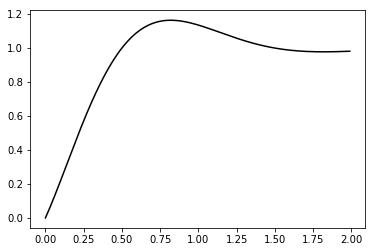

In [2]:
def g(t):
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t))

t1 = np.arange(0.0, 2.0, 0.01)

plt.figure(1)
plt.plot(t1, g(t1), 'k')
plt.show()


Consider the class of functions of the form $f(t) = 1 - e^{-at}$ where $a$ is a free parameter.
 * Find the value of $a$ that minimizes the $L_2$ norm between $g(t)$ and $f(t)$ over the interval $[0, 2]$
 * Computer the residual mean squared error
 * Explain how you obtained $a$

$Problem(1)$ 

   There are several ways to obtain parameter $a$ which would minimize the $L_2$ norm using python.
To find the value of $a$ that minimizes the $L_2$ norm between $g(t)$ and $f(t)$ over the interval $[0,2]$, we can utilize the fitting concepts such as nonlinear regression,gradient decent, and optimization through convergence(minimizing error).

   The following example demonstrates the concept of fitting to find the best possible value of $a$ to minimize the $L_2$ norm.The demonstration will treat $g(t) = 1 - (e^{-2*t} * cos(pi*t))$ as a measured data points. And it will treat $f(t) = 1 - e^{-at}$ as a predicted model to characterize the measured data point. The $scipy.optimize$ provides curve_fit() to characterize the model. And the function provides the best computed parameters as a return using least square method.

   First, we will define g(t) and plot g(t) to see what is the given data point that f(t) has to fit into. The following example defines g(t), and t1(interval [0,2].

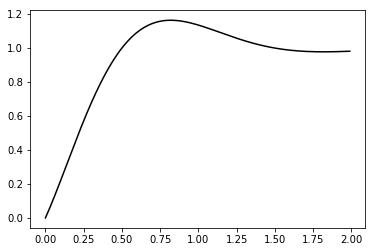

In [3]:
from scipy.optimize import *

# Define Function g(t). This is the estimation point which F(t) will try to fit into.

def g(t):  
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t)) 

# Create 400 Sample points of x Data.

t1 = np.arange(0.0, 2.0, 0.01)

# Plot g(t).

plt.figure(1)
plt.plot(t1, g(t1), 'k')
plt.show()


   Now, we are going to define our function $f(t) = 1-e^{-ax}$. scipy.optimize function curve_fit() will be used to compute the best possible value of $a$ to minimize the $L_2$ norm. And we will use computed parameter $a$ to plot g(t) and f(t) in interval[0,2].

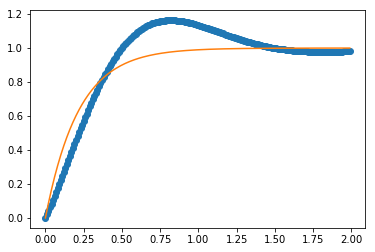

Computed value (a) from curve_fit is 4.60358


In [4]:
# Define Model Equation f(t) = 1-e^(-ax).

def f(x,a) :
    return 1 -1*np.exp(-a*x) 

# Optimize the parameters using curve_fit to get best possible value of (a) to minimize the error.

params, extras =curve_fit(f, t1, g(t1))

# Plot g(t) and optimized f(t).

plt.plot(t1,g(t1),'o')
plt.plot(t1, f(t1,params[0]))
plt.show()

# Show the the value of a for (1-e^(-ax)).

print ("Computed value (a) from curve_fit is %g" %(params[0]))


   The computed parameter $a$ is $4.60358$ and the graph above demonstrate the best fit which minimize the residual error along [0,2] $x$ intervals. This means that the sum of difference between g(t) and f(t) is smallest with $a=4.60358$. 

$Problem(2)$ 

   To calculate Mean Squared Error. We define our funtion as following
   
   $MSE = (1/N)*\sum (g(t)-f(t))^2$ 
   
   where $N$ is number of sample points and $\sum(g(t)-f(t))^{2}$ represens the residual error. The following Python example demonstrates the Mean Squared Error calculation with given $(g(t)-f(t))$.

In [5]:
# Calculate the Mean Error for 400 sample points.

Diff = ((g(t1) - f(t1,4.60358))**2)
ErrorSum = np.sum(Diff)
Error = (ErrorSum)
Narray = len(Diff)
MeanError= Error/Narray

# Show Mean squared error 
print ("Number of summed array is          ---->  %g" %Narray)
print ("                                            " )
print ("Following is the array of Diffference Square")
print ("                                            " )
print (Diff)
print ("                                            " )
print ("Sum of Squqared Error is           ---->  %g"%ErrorSum)
print ("                                            " )
print ("Mean of the squared error is               ---->  %g"%MeanError)

Number of summed array is          ---->  200
                                            
Following is the array of Diffference Square
                                            
[  0.00000000e+00   6.10447320e-04   2.19526878e-03   4.43287090e-03
   7.05946444e-03   9.86167651e-03   1.26699072e-02   1.53523673e-02
   1.78097398e-02   1.99704094e-02   2.17862121e-02   2.32286583e-02
   2.42855863e-02   2.49582082e-02   2.52585116e-02   2.52069834e-02
   2.48306264e-02   2.41612388e-02   2.32339323e-02   2.20858635e-02
   2.07551580e-02   1.92800058e-02   1.76979107e-02   1.60450762e-02
   1.43559121e-02   1.26626490e-02   1.09950457e-02   9.38018030e-03
   7.84231218e-03   6.40280594e-03   5.08010898e-03   3.88977406e-03
   2.84452000e-03   1.95432403e-03   1.22654001e-03   6.66037301e-04
   2.75355737e-04   5.48725711e-05   2.97780086e-06   1.16254689e-04
   3.89662718e-04   8.16720557e-04   1.38968699e-03   2.09973802e-03
   2.93713866e-03   3.89140823e-03   4.95147803e-03   6.1058

Computed Mean Square Error is $0.0113182$ when $ a = 4.60358 $.

$MSE = 0.0113182 $

$ a = 4.60358 $

$Problem(3)$ 

   To see wheather $a$ is properly optimized, we are going to use the defined $MSE$ equation to compute $a$ in a diffrent way.
 Finding the best model for a certain situation requires optimized function. And in our case “optimized” will mean something like “minimizing the error of the model” or “maximizes the chance of the having a best suited data.”. We are going to use the iterative method to obtain optimed paramameter $a$. And we are going to compare the results with computed answers from $Problem 1$.
 
 With given  $MSE = (1/N)*\sum (g(t)-f(t))^2$
 The Python code will interate in For loop to approach minimized error point. In other words, the Code will converge to a point where it has a (mimimum error) and from the above example we obtained that our converging error point is $MSE = 0.0113182 $.
 and as we converge to a point we will calculate our parameter $a$. From the previous example we know that it is $ a = 4.60358 $.
 
 In this code, definition compute_error() defines our total summed error along $[0,2]$ x interval. and the code utilizes converge_to_minimized_error() to approach our convergence point.
 

In [6]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


def g(t):
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t))

xn = np.arange(0.0, 2.0, 0.01)
yn = g(xn)

def compute_error(a, xn):
    totalError = 0
    for i in range(0, len(xn)):
        x = xn[i]
        y = yn[i]
        totalError += (y - (-1.0*np.exp(-1*a * x) + 1)) ** 2
    return (totalError) / float(len(xn))

def converge_to_minimized_error():
    
    N_iteration = 5000
    converged_error = 2000
    converged_iteration = 0 
    
    for i in range(0,N_iteration):
        if converged_error > compute_error(i*0.001,xn):
            converged_error = compute_error(i*0.001,xn)
            converged_iteration = i*0.001
            print(" Converging to Min error.    Error is {0} with (a) value of {1}" .format(converged_error, converged_iteration))
    return (converged_iteration,converged_error)

print(converge_to_minimized_error())



 Converging to Min error.    Error is 0.9365299535966911 with (a) value of 0.0
 Converging to Min error.    Error is 0.9345071928170777 with (a) value of 0.001
 Converging to Min error.    Error is 0.9324897559821445 with (a) value of 0.002
 Converging to Min error.    Error is 0.9304776272965317 with (a) value of 0.003
 Converging to Min error.    Error is 0.9284707910151 with (a) value of 0.004
 Converging to Min error.    Error is 0.9264692314427718 with (a) value of 0.005
 Converging to Min error.    Error is 0.9244729329343546 with (a) value of 0.006
 Converging to Min error.    Error is 0.9224818798943855 with (a) value of 0.007
 Converging to Min error.    Error is 0.9204960567769588 with (a) value of 0.008
 Converging to Min error.    Error is 0.9185154480855678 with (a) value of 0.009000000000000001
 Converging to Min error.    Error is 0.9165400383729356 with (a) value of 0.01
 Converging to Min error.    Error is 0.9145698122408562 with (a) value of 0.011
 Converging to Min 

 Converging to Min error.    Error is 0.7218455406473474 with (a) value of 0.124
 Converging to Min error.    Error is 0.7203766256847781 with (a) value of 0.125
 Converging to Min error.    Error is 0.718911412292411 with (a) value of 0.126
 Converging to Min error.    Error is 0.7174498897912227 with (a) value of 0.127
 Converging to Min error.    Error is 0.7159920475355394 with (a) value of 0.128
 Converging to Min error.    Error is 0.7145378749129213 with (a) value of 0.129
 Converging to Min error.    Error is 0.7130873613440559 with (a) value of 0.13
 Converging to Min error.    Error is 0.7116404962826525 with (a) value of 0.131
 Converging to Min error.    Error is 0.7101972692153304 with (a) value of 0.132
 Converging to Min error.    Error is 0.7087576696615124 with (a) value of 0.133
 Converging to Min error.    Error is 0.7073216871733176 with (a) value of 0.134
 Converging to Min error.    Error is 0.7058893113354542 with (a) value of 0.135
 Converging to Min error.    E

 Converging to Min error.    Error is 0.40881161526922677 with (a) value of 0.424
 Converging to Min error.    Error is 0.40809280498995704 with (a) value of 0.425
 Converging to Min error.    Error is 0.40737560239022713 with (a) value of 0.426
 Converging to Min error.    Error is 0.40666000319308127 with (a) value of 0.427
 Converging to Min error.    Error is 0.4059460031342303 with (a) value of 0.428
 Converging to Min error.    Error is 0.4052335979620169 with (a) value of 0.429
 Converging to Min error.    Error is 0.4045227834373754 with (a) value of 0.43
 Converging to Min error.    Error is 0.40381355533379026 with (a) value of 0.431
 Converging to Min error.    Error is 0.4031059094372562 with (a) value of 0.432
 Converging to Min error.    Error is 0.4023998415462418 with (a) value of 0.433
 Converging to Min error.    Error is 0.40169534747164554 with (a) value of 0.434
 Converging to Min error.    Error is 0.4009924230367609 with (a) value of 0.435
 Converging to Min erro

 Converging to Min error.    Error is 0.17079109496555464 with (a) value of 0.985
 Converging to Min error.    Error is 0.17055502902453243 with (a) value of 0.986
 Converging to Min error.    Error is 0.17031937561116156 with (a) value of 0.987
 Converging to Min error.    Error is 0.17008413382824286 with (a) value of 0.988
 Converging to Min error.    Error is 0.16984930278089105 with (a) value of 0.989
 Converging to Min error.    Error is 0.1696148815765294 with (a) value of 0.99
 Converging to Min error.    Error is 0.16938086932488206 with (a) value of 0.991
 Converging to Min error.    Error is 0.1691472651379688 with (a) value of 0.992
 Converging to Min error.    Error is 0.1689140681300967 with (a) value of 0.993
 Converging to Min error.    Error is 0.16868127741785513 with (a) value of 0.994
 Converging to Min error.    Error is 0.1684488921201082 with (a) value of 0.995
 Converging to Min error.    Error is 0.1682169113579886 with (a) value of 0.996
 Converging to Min err

 Converging to Min error.    Error is 0.06647033387985461 with (a) value of 1.752
 Converging to Min error.    Error is 0.06639669158527274 with (a) value of 1.7530000000000001
 Converging to Min error.    Error is 0.06632314818890342 with (a) value of 1.754
 Converging to Min error.    Error is 0.06624970353455822 with (a) value of 1.7550000000000001
 Converging to Min error.    Error is 0.06617635746635678 with (a) value of 1.756
 Converging to Min error.    Error is 0.06610310982872632 with (a) value of 1.7570000000000001
 Converging to Min error.    Error is 0.0660299604664013 with (a) value of 1.758
 Converging to Min error.    Error is 0.06595690922442154 with (a) value of 1.7590000000000001
 Converging to Min error.    Error is 0.0658839559481329 with (a) value of 1.76
 Converging to Min error.    Error is 0.06581110048318552 with (a) value of 1.7610000000000001
 Converging to Min error.    Error is 0.06573834267553362 with (a) value of 1.762
 Converging to Min error.    Error i

 Converging to Min error.    Error is 0.05531469561874774 with (a) value of 1.921
 Converging to Min error.    Error is 0.05525577160440889 with (a) value of 1.922
 Converging to Min error.    Error is 0.055196923952656 with (a) value of 1.923
 Converging to Min error.    Error is 0.05513815255045192 with (a) value of 1.924
 Converging to Min error.    Error is 0.0550794572849685 with (a) value of 1.925
 Converging to Min error.    Error is 0.055020838043586456 with (a) value of 1.926
 Converging to Min error.    Error is 0.054962294713894376 with (a) value of 1.927
 Converging to Min error.    Error is 0.05490382718368875 with (a) value of 1.928
 Converging to Min error.    Error is 0.05484543534097325 with (a) value of 1.929
 Converging to Min error.    Error is 0.05478711907395837 with (a) value of 1.93
 Converging to Min error.    Error is 0.05472887827106072 with (a) value of 1.931
 Converging to Min error.    Error is 0.054670712820902974 with (a) value of 1.932
 Converging to Mi

 Converging to Min error.    Error is 0.033477890837576366 with (a) value of 2.4210000000000003
 Converging to Min error.    Error is 0.0334464222759926 with (a) value of 2.422
 Converging to Min error.    Error is 0.03341499236483727 with (a) value of 2.423
 Converging to Min error.    Error is 0.03338360105550884 with (a) value of 2.424
 Converging to Min error.    Error is 0.033352248299480594 with (a) value of 2.4250000000000003
 Converging to Min error.    Error is 0.033320934048300326 with (a) value of 2.426
 Converging to Min error.    Error is 0.03328965825359043 with (a) value of 2.427
 Converging to Min error.    Error is 0.03325842086704733 with (a) value of 2.428
 Converging to Min error.    Error is 0.033227221840441884 with (a) value of 2.4290000000000003
 Converging to Min error.    Error is 0.033196061125618896 with (a) value of 2.43
 Converging to Min error.    Error is 0.03316493867449702 with (a) value of 2.431
 Converging to Min error.    Error is 0.0331338544390686

 Converging to Min error.    Error is 0.015469984348637418 with (a) value of 3.423
 Converging to Min error.    Error is 0.015461313316206182 with (a) value of 3.424
 Converging to Min error.    Error is 0.015452654783849289 with (a) value of 3.4250000000000003
 Converging to Min error.    Error is 0.015444008738680418 with (a) value of 3.426
 Converging to Min error.    Error is 0.015435375167828145 with (a) value of 3.427
 Converging to Min error.    Error is 0.0154267540584359 with (a) value of 3.428
 Converging to Min error.    Error is 0.015418145397662038 with (a) value of 3.4290000000000003
 Converging to Min error.    Error is 0.015409549172679787 with (a) value of 3.43
 Converging to Min error.    Error is 0.015400965370677097 with (a) value of 3.431
 Converging to Min error.    Error is 0.015392393978856812 with (a) value of 3.432
 Converging to Min error.    Error is 0.015383834984436497 with (a) value of 3.4330000000000003
 Converging to Min error.    Error is 0.01537528837

We see that the code has approached $0.011318183915466264$ and returned value of $4.603$ as paramter $a$. This validates the results obtained from curve_fit() function from scipy.optimize. Note that the resolution of increasing step for validating $a$ is 0.001. This means that to have better resolution, the algorithm has to have more iteration with smaller incremental steps.

Also, note that at $4603^{th}$ iteration ($i=4603$), the code has breaked out of the For loop and it has concluded that it was at its convergence.